In [1]:
import re
import pandas as pd
import numpy as np
import json
import subprocess
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')

Number of installed projects
Number of dropouts at each stage


In [ ]:
test_mode = 'BaseModel'
data_mode = 'Logs'
file = '/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Examples/' + test_mode + '/' + data_mode + '/world_log.log'

    
with open(file) as infile:
    for line in infile:
        print(line, end='')

In [ ]:
#find begin of an info string 


In [25]:
test_str = 'time: Mon 2017-02-06 11:26:51  INFO: EParamTypes::None : 805'
regex = re.compile('(INFO:\s)')
res = regex.findall(test_str)

In [26]:
print(res)

['INFO: ']


In [42]:
res = re.split(regex, test_str)
print(res)

['time: Mon 2017-02-06 11:26:51  ', 'INFO: ', 'EParamTypes::None : 805']


In [43]:
regex2 = re.compile('(::[\w]*\s*:\s*)')
res2 = regex2.findall(res[2])
print(res2)

['::None : ']


In [47]:
res2 = re.split(regex2, res[2])

In [53]:
regex3 = re.compile('[^:\s]+')
res3 = regex3.findall(res2[1])
print(res3)

['None']


In [66]:

test4_str = 'time: Mon 2017-02-06 19:15:14  INFO: N active agents at tick 5 : 453'
#check if it is 'N active agents at tick'
regex4 = re.compile('(N\s*active\s*agents\s*at\s*tick\s*)')
res4 = regex4.search(test4_str)
res4 = re.split(regex4, test4_str)
print(res4)

['time: Mon 2017-02-06 19:15:14  INFO: ', 'N active agents at tick ', '5 : 453']


In [68]:
regex5 = re.compile('(\s*:\s*)')
res5 = re.split(regex5, res4[2])
print(res5)

['5', ' : ', '453']


In [75]:
test6_str = 'time: Mon 2017-02-06 19:15:14  INFO: Number of installed projects: 0'
#check if it is 'Number of installed projects'
regex6 = re.compile('(Number\s*of\s*installed\s*projects\s*:\s*)')
res6 = regex6.search(test6_str)
print(res6)
res6 = re.split(regex6, test6_str)
print(res6)

<_sre.SRE_Match object; span=(37, 67), match='Number of installed projects: '>
['time: Mon 2017-02-06 19:15:14  INFO: ', 'Number of installed projects: ', '0']


In [22]:
#Reads data from the given file into the given list
def read_data_from_log(file, data_):
    regex_begin_tick = re.compile('(N\s*active\s*agents\s*at\s*tick\s*)')
    regex_end_tick = re.compile('(Number\s*of\s*installed\s*projects\s*:\s*)')
    regex_data =  re.compile('(INFO:\s)')
    regex_data_check = re.compile('EParamTypes')
    regex_enum = re.compile('(::[\w]*\s*:\s*)')
    regex_enum_name = re.compile('([^:\s]+)')
    regex_1 = re.compile('(\s*:\s*)')
    
    
    with open(file) as infile:
        for line in infile:
            if regex_begin_tick.search(line):
                #parse tick number 
                #start new dictionary in the list
                data_.append({})

                #get tick 
                res = re.split(regex_1, re.split(regex_begin_tick, line)[-1])
                data_[-1]['N_AGENTS'] = float(res[-1])
                data_[-1]['tick'] = float(res[0])
            elif regex_end_tick.search(line):
                res = re.split(regex_end_tick, line)
                data_[-1]['N_PROJECTS'] = float(res[-1])
            else:
                if (regex_data.search(line)) and (regex_data_check.search(line)):
                    res = re.split(regex_data, line)
                    #get last part and enum name 
                    #last part is number
                    res2 = re.split(regex_enum, res[-1])
                    #get enum name 
                    data_[-1]['EParamTypes::' + re.split(regex_enum_name, res2[-2])[-2]] = float(res2[-1])
#    print(data_)
            

In [23]:
def get_subset_data(data_):
    #data_column_names
    data_columns = {'EParamTypes::HOStateDroppedOutNCDecStage':[],\
                   'EParamTypes::HOStateDroppedOutSEIStage':[],\
                   'EParamTypes::HOStateDroppedOutDesignStage':[]}
    tick = []
    i = 0
    #collect data for each tick 
    for row in data_:
        for key, value in data_columns.items():
            value.append(0.0)
            if key in row:
                value[-1] = row[key]
        tick.append(i)
        i = i + 1
    
    return data_columns

#print(data_columns)

In [46]:
test_mode = 'BaseModel'
data_mode = 'Logs'
version = '_v1'
#file = '/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Examples/' + test_mode + '/' + data_mode + '/world_log' + \
#        version + '.log'
    
    
#get latest file 
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Examples/' + test_mode + '/' + data_mode +\
                 '/*[_log].log')
files.sort(key=os.path.getmtime, reverse=True)
file = files[0]    

#if find N active agents at tick
# start data for the tick 
#parse data - name of the enum, value
data_v1 = []
read_data_from_log(file, data_v1)
data_subset_v1 = get_subset_data(data_v1)

In [47]:
test_mode = 'BaseModel'
data_mode = 'Logs'
version = '_v2'
#file = '/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Examples/' + test_mode + '/' + data_mode + '/world_log' + \
#        version + '.log'
    
    
#get latest file 
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Examples/' + test_mode + '/' + data_mode +\
                 '/*[_log].log')
files.sort(key=os.path.getmtime, reverse=True)
file = files[0]    

#if find N active agents at tick
# start data for the tick 
#parse data - name of the enum, value
data_v2 = []
read_data_from_log(file, data_v2)
data_subset_v2 = get_subset_data(data_v2)

In [48]:
df_v1 = pd.DataFrame(
data_subset_v1
)
df_v1.index.name = 'tick'

In [49]:
df_v2 = pd.DataFrame(
data_subset_v2
)
df_v2.index.name = 'tick'

In [ ]:
columns = ['EParamTypes::HOStateDroppedOutNCDecStage']
data_ = [df_v1[columns].values, df_v2[columns].values]
index_ = df_v1[columns].index.values
print(data_)
plt.plot(data_)


In [30]:
df_v1[columns].index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64)

In [32]:
df_v1[columns].values.shape

(51, 1)

In [ ]:
df_v1.head(10)

In [43]:
test_mode = 'BaseModel'
data_mode = 'Logs'

#names of columns in a file
names = ['N_installed', 'N_installed_sum', 'P_av_total', 'P_av']
for i in range(3):
    names.append('sei_markup_' + str(i))



#read few files
#save into database
dfs_ = []
#read last simulation result
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/'+ test_mode +\
                 '/*[_w].csv')
files.sort(key=os.path.getmtime, reverse=True)

#take top 1 files 
for file in files[0:2]:
    df_ = pd.read_csv(file, names=names, low_memory=False)
    dfs_.append(df_)

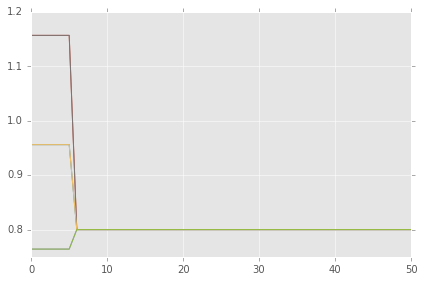

In [44]:
data_mode = 'bm_'
test_mode = 'markups'

fig, axes_ = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(bottom=0.25)
#if ncols = 1  - transform into list
axes = [axes_]

axes[0].plot(dfs_[0][['sei_markup_' + str(i) for i in range(3)]])
axes[0].plot(dfs_[1][['sei_markup_' + str(i) for i in range(3)]])

plt.tight_layout()
plt.savefig('Simulation_results_' + data_mode + test_mode +  '.png', dpi=300)
plt.show()    

In [65]:
dfs_[0].head(10)

,N_installed,N_installed_sum,P_av_total,P_av,sei_markup_0,sei_markup_1,sei_markup_2
0,0,0,-nan(ind),0,0.656879,0.45606,0.264173
1,0,0,-nan(ind),0,0.656879,0.45606,0.264173
2,0,0,-nan(ind),0,0.656879,0.45606,0.264173
3,0,0,-nan(ind),-nan(ind),0.656879,0.45606,0.264173
4,0,0,-nan(ind),0,0.656879,0.45606,0.264173
5,0,0,-nan(ind),0,0.656879,0.45606,0.264173
6,0,0,-nan(ind),0,1.200000,1.20000,1.200000
7,0,0,-nan(ind),0,1.200000,1.20000,1.200000
8,0,0,-nan(ind),-nan(ind),1.200000,1.20000,1.200000
9,0,0,-nan(ind),0,1.200000,1.20000,1.200000


In [ ]:
#x - tick 
#y - drop outs per tick 

In [29]:
N_TICKS_DISPLAY = 50

In [30]:
N_TICKS = 50

In [31]:
columns = ['EParamTypes::HOStateDroppedOutNCDecStage', \
            'EParamTypes::HOStateDroppedOutSEIStage',\
            'EParamTypes::HOStateDroppedOutDesignStage']

In [32]:
data_mode = 'bm_'
test_mode = 'drops'


In [51]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(len(columns)))
colors_ = []

i = 0
for column in columns:
    colors_.append(cmap_custom(i))
    i = i + 1
    
print(colors_)

[(1.0, 1.0, 0.89803922176361084, 1.0), (0.9990157632266774, 0.99963091121000403, 0.89262591951033643, 1.0), (0.9980315264533548, 0.99926182242000805, 0.88721261725706213, 1.0)]


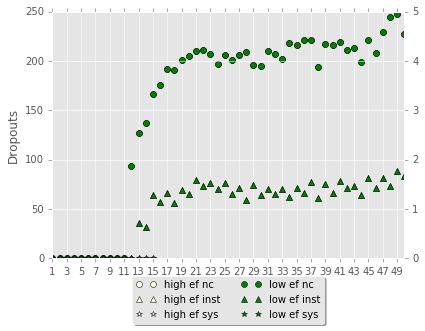

In [52]:
data_mode = 'bm_'
test_mode = 'drops'
fig, axes_ = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(bottom=0.25)

#if ncols = 1  - transform into list
axes = [axes_]

axes_0_tw = axes[0].twinx()

ind = np.arange(N_TICKS)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ind = df_v1.index.values[0:N_TICKS_DISPLAY] + 1

lines = []
i = 0


markers = ["ro", "r^", "r*"]
markerfacecolors = colors_
colors = ['r', 'r', 'r']
labels_raw = ["nc", "inst", "sys"]
labels = ['high ef ' + x for x in labels_raw]

for column in columns[0:2]:
    pi, = axes[0].plot(ind, df_v1[column][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    pi.set_markerfacecolor(markerfacecolors[i])
    lines.append(pi)
    i = i + 1
    
#plot on a separate axis
pi, = axes_0_tw.plot(ind, df_v1[columns[-1]][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
pi.set_markerfacecolor(markerfacecolors[i])
lines.append(pi)
i = i + 1

    
markers = ["go", "g^", "g*"]
colors = ['g', 'g', 'g']
labels = ['low ef ' + x for x in labels_raw]

i = 0
for column in columns[0:2]:
    pi, = axes[0].plot(ind, df_v2[column][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    lines.append(pi)
    i = i + 1
    
#plot on a separate axis
pi, = axes_0_tw.plot(ind, df_v2[columns[-1]][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
lines.append(pi)
i = i + 1
    

axes[0].set_xlabel("Time")
axes[0].set_ylabel("Dropouts")


#axes[0].set_autoscaley_on(False)
axes[0].set_xlim([1,50])
axes_0_tw.set_ylim([0.0, 5.0])
start = 1
end = 50
axes[0].xaxis.set_ticks(np.arange(start, end, 2))




# Shrink current axis's height by 10% on the bottom
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
lgd = axes[0].legend(lines, [l.get_label() for l in lines], loc='upper center', bbox_to_anchor=(0.5, -0.05),\
          fancybox=True, shadow=True, fontsize='10', ncol = 2)




plt.tight_layout()
plt.savefig('Simulation_results_' + data_mode + test_mode +  '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


In [119]:
#number of installations per tick

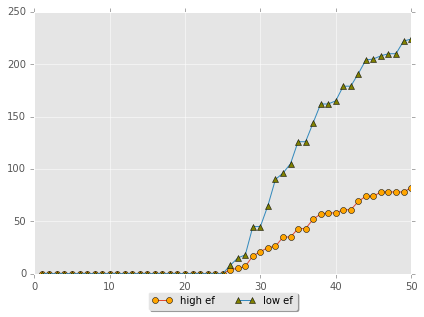

In [45]:
data_mode = 'bm_'
test_mode = 'inst'
column = ['N_installed_sum']
colors_ = ['orange', 'olive', 'khaki'] 
fig, axes_ = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(bottom=0.25)

#if ncols = 1  - transform into list
axes = [axes_]

ind = np.arange(N_TICKS)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ind = dfs_[0].index.values[0:N_TICKS_DISPLAY] + 1

lines = []

markers = ["o-", "^-", "*-"]
markerfacecolors = colors_
colors = ['r', 'r', 'r']
labels = ['high ef', 'low ef']

for i in range(2) :
    pi, = axes[0].plot(ind, dfs_[i][column][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    pi.set_markerfacecolor(markerfacecolors[i])
    lines.append(pi)
    
    
    
# Shrink current axis's height by 10% on the bottom
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
lgd = axes[0].legend(lines, [l.get_label() for l in lines], loc='upper center', bbox_to_anchor=(0.5, -0.05),\
          fancybox=True, shadow=True, fontsize='10', ncol = 2)




plt.tight_layout()
plt.savefig('Simulation_results_' + data_mode + test_mode +  '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(bottom=0.25)




ind = np.arange(N_TICKS)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

lines = []
i = 0


markers = ["ro", "r^", "r*"]
colors = ['r', 'r', 'r']
labels = ["er", "el", "el"]

for column in columns:
    pi, = axes[0].plot(ind, df_v1[column][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    lines.append(pi)
    i = i + 1
    


#p1, = axes[0].plot(ind, df['sem_max'][0:N_TICKS_DISPLAY], "g-", label="max")    
p2, = axes[0].plot(ind, df['sei_0'][0:N_TICKS_DISPLAY], "ro", label="er")
p3, = axes[0].plot(ind, df['sei_1'][0:N_TICKS_DISPLAY], "r^", label="el")
p4, = axes[0].plot(ind, df['sei_2'][0:N_TICKS_DISPLAY], "r*", label="el")


#axes[0].fill_between(ind, 
#                  df['sem_max'][0:N_TICKS_DISPLAY]-2*df_std['sem_max'][0:N_TICKS_DISPLAY], 
#                  df['sem_max'][0:N_TICKS_DISPLAY]+2*df_std['sem_max'][0:N_TICKS_DISPLAY], 
#                  color='g', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_0'][0:N_TICKS_DISPLAY]-2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
#                  df['sei_0'][0:N_TICKS_DISPLAY]+2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_1'][0:N_TICKS_DISPLAY]-2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
#                  df['sei_1'][0:N_TICKS_DISPLAY]+2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_2'][0:N_TICKS_DISPLAY]-2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
#                  df['sei_2'][0:N_TICKS_DISPLAY]+2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)


#lines = [p1, p2, p3, p4]
lines = [p2, p3, p4]
axes[0].legend(lines, [l.get_label() for l in lines], fontsize='10', loc=2)

axes[0].set_xlabel("Time")
axes[0].set_ylabel("Efficiency")
#axes[0].set_title('Efficiency relative to the \n maximum available', fontsize=10)
axes[0].set_title('Efficiency', fontsize=10)

axes[0].set_autoscaley_on(False)
axes[0].set_xlim([1,15])
axes[0].set_ylim([0.15, 0.40])
start = 1
end = 16
axes[0].xaxis.set_ticks(np.arange(start, end, 2))


#agents_to_show = ['sem_rel_min'] + ['sei_rel_' + str(i) for i in range(3)]
#markers = ["g-", "ro", "r^", "r*"]
#colors = ['g', 'r', 'r', 'r']
#labels = ["min", "er", "el", "el"]


agents_to_show = ['sei_rel_' + str(i) for i in range(3)]
markers = ["ro", "r^", "r*"]
colors = ['r', 'r', 'r']
labels = ["er", "el", "el"]

i = 0
lines = []

for agent in agents_to_show:
    pi, = axes[1].plot(ind, df[agent][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    lines.append(pi)
    i = i + 1

#i = 0
#for agent in agents_to_show:
#    axes[1].fill_between(ind, 
#                  df[agent][0:N_TICKS_DISPLAY]-2*df_std[agent][0:N_TICKS_DISPLAY], 
#                  df[agent][0:N_TICKS_DISPLAY]+2*df_std[agent][0:N_TICKS_DISPLAY], 
#                  color=colors[i], 
#                  alpha=0.2)
#    i = i + 1
    

#axes[1].legend(lines, [l.get_label() for l in lines], fontsize='10', loc=2)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Reliability")
#axes[1].set_title('Reliability relative to the \n minimum available', fontsize=10)
axes[1].set_title('Reliability', fontsize=10)
    
axes[1].set_autoscaley_on(False)
axes[1].set_xlim([1,15])
axes[1].set_ylim([0, 45])
axes[1].xaxis.set_ticks(np.arange(start, end, 2))
    
    
plt.tight_layout()
plt.savefig('Simulation_results_relatives_' + data_mode + '.png', dpi=300)
plt.show()

In [ ]:
df = pd.DataFrame(
{
        'HOStateDroppedOutNCDecStage':data_column1,
        'HOStateDroppedOutSEIStage':data_column2
    }
)
df.index.name = 'tick'
df

In [ ]:
df = pd.DataFrame(
data_columns
)
df.index.name = 'tick'
df

In [ ]:
#TODO plot drop out rates per type, plot number of installations per efficiency assumption

In [ ]:
#shares amoung installers per type? - number of installations per installer

In [ ]:
#different efficiencies - number of installations - efficiency at the same price

In [ ]:
#read old file


In [ ]:
dir(df.index)

In [6]:
test_mode = 'BaseModel'
data_mode = 'Logs'
mode = 'NEW'
model_file = 'C:\\Users\\wilfeli\\Dropbox\\ABM\\SolarPanels\\ABMIRISLab\\Examples\\' + test_mode + '\\basemodel.model'

w_file = 'C:\\Users\\wilfeli\\Dropbox\\ABM\\SolarPanels\\ABMIRISLab\\Examples\\' + test_mode + '\\w.json'
sem_file = 'C:\\Users\\wilfeli\\Dropbox\\ABM\\SolarPanels\\ABMIRISLab\\Examples\\' + test_mode + '\\sem.json'
ho_file = 'C:\\Users\\wilfeli\\Dropbox\\ABM\\SolarPanels\\ABMIRISLab\\Examples\\' + test_mode + '\\ho.json'

In [16]:
adjustment = 1.0
el_price = 0.10

In [17]:
with open(w_file) as infile:
    w_setup = json.load(infile)
    for setting in w_setup['WorldSettings']['params_exog']:
        if 'EParamTypes::ScenarioEfficiencyAdjustment' in setting:
            setting['EParamTypes::ScenarioEfficiencyAdjustment'] = adjustment
        if 'EParamTypes::ElectricityPriceUCDemand' in setting:
            setting['EParamTypes::ElectricityPriceUCDemand'] = el_price
        if 'EParamTypes::ElectricityPriceUCSupply' in setting:
            setting['EParamTypes::ElectricityPriceUCSupply'] = el_price
            
    with open(w_file, 'w') as outfile:
        json.dump(w_setup, outfile)
            
with open(sem_file) as infile:
    sem_setup = json.load(infile)
    sem_setup['costs_base'] = 0.39 * adjustment
    
    with open(sem_file, 'w') as outfile:
        json.dump(sem_setup, outfile)
        
        
with open(ho_file) as infile:
    ho_setup = json.load(infile)
    ho_setup['House']['roof_effective_size'] = 'FORMULA::0.25'
    
    with open(ho_file, 'w') as outfile:
        json.dump(ho_setup, outfile)
    


In [42]:
path = 'C:\\Users\\wilfeli\\Dropbox\\ABM\\SolarPanels\\solar-model\\Model\\BaseModel.exe'
args = [path, mode, model_file]
subprocess.call([path, mode, model_file])

0

http://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box
    http://stackoverflow.com/questions/8971834/matplotlib-savefig-with-a-legend-outside-the-plot
    http://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box?noredirect=1&lq=1